<a href="https://colab.research.google.com/github/ewuerfel66/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/EricWuerfel_LS_DS5_112_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Your assignment - pick a dataset and do something like the above

This is purposely open-ended - you can pick any data set you wish. It is highly advised you pick a dataset from UCI or a similar semi-clean source. You don't want the data that you're working with for this assignment to have any bigger issues than maybe not having headers or including missing values, etc.

After you have chosen your dataset, do the following:

    Import the dataset using the method that you are least comfortable with (!curl or CSV upload).
        Make sure that your dataset has the number of rows and columns that you expect.
        Make sure that your dataset has appropriate column names, rename them if necessary.
        If your dataset uses markers like "?" to indicate missing values, replace them with NaNs during import.
    Identify and fill missing values in your dataset (if any)
        Don't worry about using methods more advanced than the .fillna() function for today.
    Create one of each of the following plots using your dataset
        Scatterplot
        Histogram
        Density Plot
        Pairplot (note that pairplots will take a long time to load with large datasets or datasets with many columns)

If you get that done and want to try more challenging or exotic things, go for it! Use documentation as illustrated above, and follow the 20-minute rule (that is - ask for help if you're stuck!).

If you have loaded a few traditional datasets, see the following section for suggested stretch goals.

In [0]:
import pandas as pd
import numpy as np
from statistics import median, mean

In [0]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/bridges/bridges.data.version1

In [0]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/bridges/bridges.names

In [44]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/bridges/bridges.data.version1', header = None)
df.columns = ['IDENTIF', 'RIVER', 'LOCATION', 'ERECTED', 'PURPOSE', 'LENGTH', 'LANES', 'CLEAR', 'T_OR_D', 'MATERIAL', 'SPAN', 'REL_LENGTH', 'TYPE']
df.head(20)

,IDENTIF,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR,T_OR_D,MATERIAL,SPAN,REL_LENGTH,TYPE
0,E1,M,3,1818,HIGHWAY,?,2,N,THROUGH,WOOD,SHORT,S,WOOD
1,E2,A,25,1819,HIGHWAY,1037,2,N,THROUGH,WOOD,SHORT,S,WOOD
2,E3,A,39,1829,AQUEDUCT,?,1,N,THROUGH,WOOD,?,S,WOOD
3,E5,A,29,1837,HIGHWAY,1000,2,N,THROUGH,WOOD,SHORT,S,WOOD
4,E6,M,23,1838,HIGHWAY,?,2,N,THROUGH,WOOD,?,S,WOOD
5,E7,A,27,1840,HIGHWAY,990,2,N,THROUGH,WOOD,MEDIUM,S,WOOD
6,E8,A,28,1844,AQUEDUCT,1000,1,N,THROUGH,IRON,SHORT,S,SUSPEN
7,E9,M,3,1846,HIGHWAY,1500,2,N,THROUGH,IRON,SHORT,S,SUSPEN
8,E10,A,39,1848,AQUEDUCT,?,1,N,DECK,WOOD,?,S,WOOD
9,E11,A,29,1851,HIGHWAY,1000,2,N,THROUGH,WOOD,MEDIUM,S,WOOD


Let's look at some of the '?'s

In [45]:
print(df.LENGTH[0])
type(df.LENGTH[0])

?


str

**Replace "?"s with NaNs**

In [0]:
df.replace("?", np.NaN, inplace=True)

In [47]:
df.isnull().sum()

IDENTIF        0
RIVER          0
LOCATION       1
ERECTED        0
PURPOSE        0
LENGTH        27
LANES         16
CLEAR          2
T_OR_D         6
MATERIAL       2
SPAN          16
REL_LENGTH     5
TYPE           2
dtype: int64

LOCATION, CLEAR, T_OR_D, MATERIAL, SPAN, REL_LENGTH, & TYPE can be replaced with ffill.

In [48]:
df['LOCATION'] = df['LOCATION'].fillna(method='ffill')
df['CLEAR'] = df['CLEAR'].fillna(method='ffill')
df['T_OR_D'] = df['T_OR_D'].fillna(method='ffill')
df['MATERIAL'] = df['MATERIAL'].fillna(method='ffill')
df['SPAN'] = df['SPAN'].fillna(method='ffill')
df['REL_LENGTH'] = df['REL_LENGTH'].fillna(method='ffill')
df['TYPE'] = df['TYPE'].fillna(method='ffill')
df.head()

,IDENTIF,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR,T_OR_D,MATERIAL,SPAN,REL_LENGTH,TYPE
0,E1,M,3,1818,HIGHWAY,NaN,2,N,THROUGH,WOOD,SHORT,S,WOOD
1,E2,A,25,1819,HIGHWAY,1037,2,N,THROUGH,WOOD,SHORT,S,WOOD
2,E3,A,39,1829,AQUEDUCT,NaN,1,N,THROUGH,WOOD,SHORT,S,WOOD
3,E5,A,29,1837,HIGHWAY,1000,2,N,THROUGH,WOOD,SHORT,S,WOOD
4,E6,M,23,1838,HIGHWAY,NaN,2,N,THROUGH,WOOD,SHORT,S,WOOD


Replace missing numeric values with the median of the column

In [49]:
type(df.LENGTH[1])

str

Convert non-NaN lengths to integers

In [0]:
def clean_LENGTH(value):
  if type(value) == str:
    return(int(value))

In [0]:
clean_LENGTH(df.LENGTH[0])

In [0]:
df['LENGTH'] = df['LENGTH'].apply(clean_LENGTH)

In [53]:
df.head()

,IDENTIF,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR,T_OR_D,MATERIAL,SPAN,REL_LENGTH,TYPE
0,E1,M,3,1818,HIGHWAY,NaN,2,N,THROUGH,WOOD,SHORT,S,WOOD
1,E2,A,25,1819,HIGHWAY,1037.0,2,N,THROUGH,WOOD,SHORT,S,WOOD
2,E3,A,39,1829,AQUEDUCT,NaN,1,N,THROUGH,WOOD,SHORT,S,WOOD
3,E5,A,29,1837,HIGHWAY,1000.0,2,N,THROUGH,WOOD,SHORT,S,WOOD
4,E6,M,23,1838,HIGHWAY,NaN,2,N,THROUGH,WOOD,SHORT,S,WOOD


In [59]:
median_LENGTH = df.LENGTH.median()
print(median_LENGTH)

1300.0


In [62]:
df.LENGTH = df.LENGTH.fillna(median_LENGTH)
df.head()

,IDENTIF,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR,T_OR_D,MATERIAL,SPAN,REL_LENGTH,TYPE
0,E1,M,3,1818,HIGHWAY,1300.0,2,N,THROUGH,WOOD,SHORT,S,WOOD
1,E2,A,25,1819,HIGHWAY,1037.0,2,N,THROUGH,WOOD,SHORT,S,WOOD
2,E3,A,39,1829,AQUEDUCT,1300.0,1,N,THROUGH,WOOD,SHORT,S,WOOD
3,E5,A,29,1837,HIGHWAY,1000.0,2,N,THROUGH,WOOD,SHORT,S,WOOD
4,E6,M,23,1838,HIGHWAY,1300.0,2,N,THROUGH,WOOD,SHORT,S,WOOD


Lanes

In [63]:
median_LANES = df.LANES.median()
print(median_LANES)

2.0


In [0]:
df.LANES = df.LANES.fillna(median_LANES)

In [65]:
df.isnull().sum()

IDENTIF       0
RIVER         0
LOCATION      0
ERECTED       0
PURPOSE       0
LENGTH        0
LANES         0
CLEAR         0
T_OR_D        0
MATERIAL      0
SPAN          0
REL_LENGTH    0
TYPE          0
dtype: int64

Let's make some plots

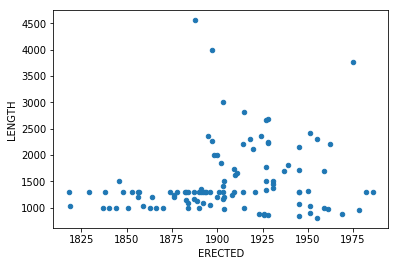

In [67]:
df.plot.scatter('ERECTED', 'LENGTH');

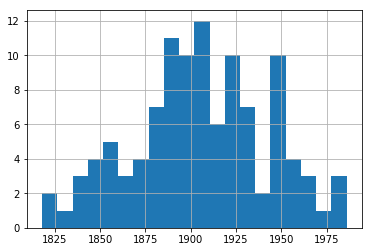

In [69]:
df.ERECTED.hist(bins=20); #a bin for each decade

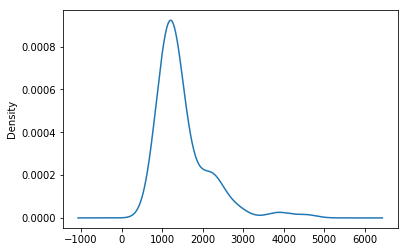

In [70]:
df.LENGTH.plot.density();